The Boston data frame has 506 rows and 14 columns.

This data frame contains the following columns:

crim
per capita crime rate by town.

zn
proportion of residential land zoned for lots over 25,000 sq.ft.

indus
proportion of non-retail business acres per town.

chas
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

nox
nitrogen oxides concentration (parts per 10 million).

rm
average number of rooms per dwelling.

age
proportion of owner-occupied units built prior to 1940.

dis
weighted mean of distances to five Boston employment centres.

rad
index of accessibility to radial highways.

tax
full-value property-tax rate per $10,000.

ptratio
pupil-teacher ratio by town.

black
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

lstat
lower status of the population (percent).

medv
median value of owner-occupied homes in $1000s


Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.

Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.

medv - target variable.


###### road map

 problem understading - predict the housing prices
 Hypothesis 
 data collection - kaggle
 understand the variables
 preprossing 
 visualizaions

Modeling:

linear regression

support vector regression

Evaluation-RMSE

#### load pacages and get the data

In [2]:
import numpy as np
import pandas as pd # analytics 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_data = pd.read_csv('train (7).csv',header='infer')

In [3]:
train_data.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [4]:
train_data.tail()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
328,500,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
329,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
330,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
331,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
332,506,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID         333 non-null int64
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
black      333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


In [6]:
train_data.isnull().sum()

ID         0
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

#### no missing values.

#### descriptive statistics


In [9]:
train_data.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


#### Visualizations


Text(0.5,0,'indus non retail shops')

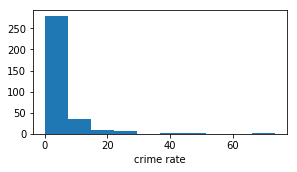

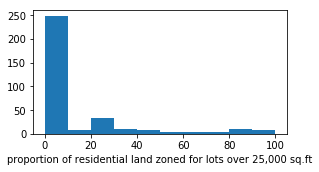

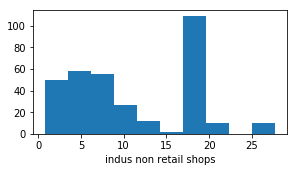

In [45]:
%matplotlib inline
#train_data['crim'].plot(kind='hist')

plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
plt.hist(train_data['crim'])
plt.xlabel('crime rate')
plt.xlim

plt.figure(figsize=(10,5))
plt.subplot(2,2,2)
plt.hist(train_data['zn'])
plt.xlabel('proportion of residential land zoned for lots over 25,000 sq.ft')

plt.figure(figsize=(10,5))
plt.subplot(2,2,3)
plt.hist(train_data['indus'])
plt.xlabel('indus non retail shops')

Text(0.5,0,'char')

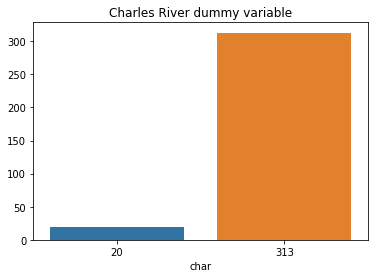

In [63]:
char = train_data['chas'].value_counts()
sns.barplot(x=char,y=char.values,orient='v')
plt.title('Charles River dummy variable')
plt.xlabel('char')

Text(0.5,1,'age proportion of owner-occupied units built prior to 1940')

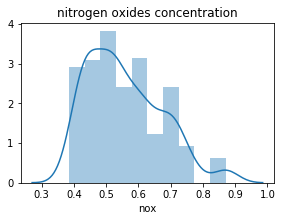

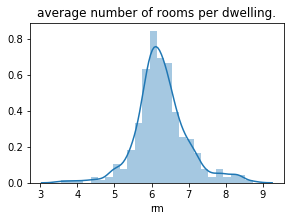

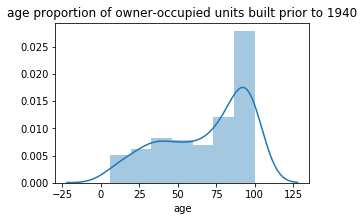

In [83]:
plt.figure(figsize=(10,10))
plt.subplot(3,2,1)
sns.distplot(train_data['nox'])
plt.title('nitrogen oxides concentration')

plt.figure(figsize=(10,10))
plt.subplot(3,2,2)
sns.distplot(train_data['rm'])
plt.title('average number of rooms per dwelling.')

plt.figure(figsize=(10,10))
plt.subplot(3,2,3)
sns.distplot(train_data['age'])
plt.title('age proportion of owner-occupied units built prior to 1940')

In [64]:
# rm average number of rooms per dwelling is almost normally distibuted
# proportion of owner - occupied prior to 1940 we can see that 45 % is between 85-100

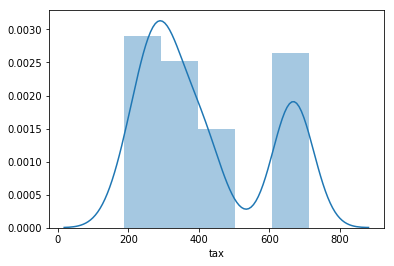

In [102]:
# lets see how the tax is distibuted
#sns.barplot(x=train_data['tax'],y=train_data['tax'].values)

sns.distplot(train_data['tax'])


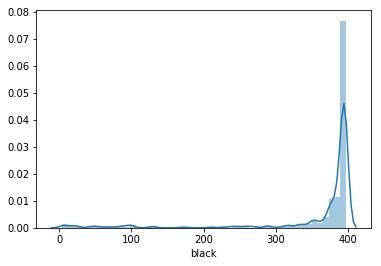

In [100]:
sns.distplot(train_data['black'])

In [108]:
# lets see the correlation between variabels

train_data.columns
lists = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad','tax', 'ptratio', 'black', 'lstat']

In [114]:

corr = train_data[lists].corr()
print(corr)

             crim        zn     indus      chas       nox        rm       age  \
crim     1.000000 -0.210913  0.422228 -0.041195  0.463001 -0.310180  0.379034   
zn      -0.210913  1.000000 -0.518679 -0.024442 -0.501990  0.328197 -0.544513   
indus    0.422228 -0.518679  1.000000  0.037496  0.750087 -0.440365  0.638378   
chas    -0.041195 -0.024442  0.037496  1.000000  0.080275  0.112251  0.068286   
nox      0.463001 -0.501990  0.750087  0.080275  1.000000 -0.338515  0.736000   
rm      -0.310180  0.328197 -0.440365  0.112251 -0.338515  1.000000 -0.248573   
age      0.379034 -0.544513  0.638378  0.068286  0.736000 -0.248573  1.000000   
dis     -0.397067  0.637142 -0.702327 -0.081834 -0.769364  0.269191 -0.764208   
rad      0.666636 -0.303663  0.569779  0.007714  0.612180 -0.272783  0.447380   
tax      0.617081 -0.311180  0.708313 -0.021826  0.670722 -0.356987  0.511893   
ptratio  0.313409 -0.380449  0.391087 -0.125067  0.192513 -0.366927  0.259293   
black   -0.475796  0.168130 

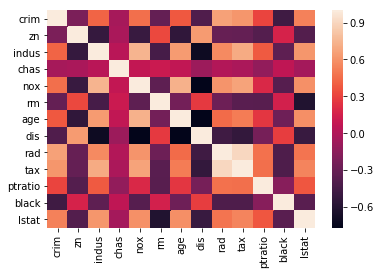

In [115]:

#plt.figure(figsize=(15,15))
sns.heatmap(corr)

In [121]:
#sns.pairplot(train_data.iloc[:,1:])

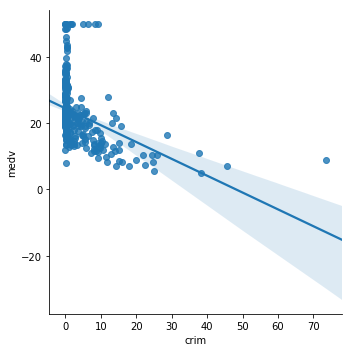

In [124]:
sns.lmplot(x='crim',y='medv',data=train_data)



sns.lmplot(x='zn',y='medv',data=train_data)

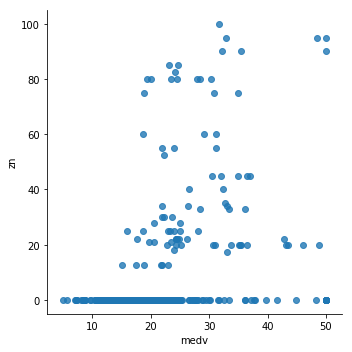

In [132]:
sns.lmplot(x='medv',y='zn',data=train_data,fit_reg=False)

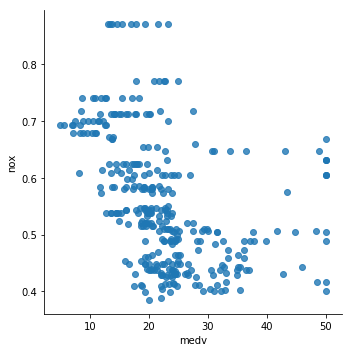

In [168]:
sns.lmplot(x='medv',y='nox',data=train_data,fit_reg=False)

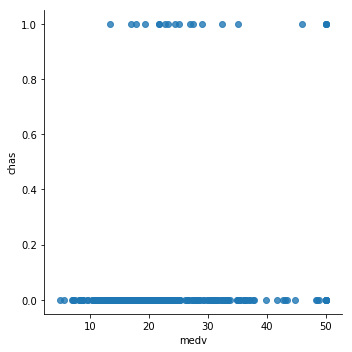

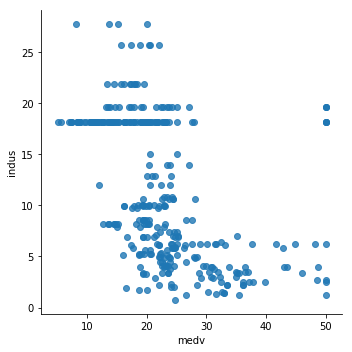

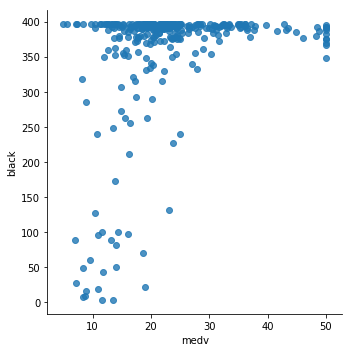

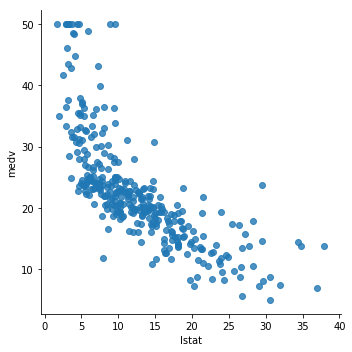

In [154]:

sns.lmplot(x='medv',y='chas',data=train_data,fit_reg=False)


sns.lmplot(x='medv',y='indus',data=train_data,fit_reg=False)


sns.lmplot(x='medv',y='black',data=train_data,fit_reg=False)


sns.lmplot(x='lstat',y='medv',data=train_data,fit_reg=False)


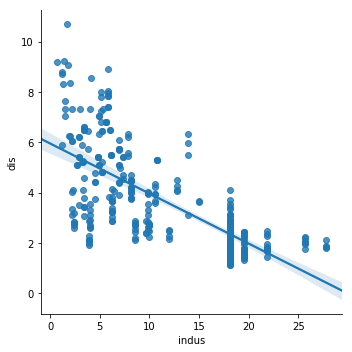

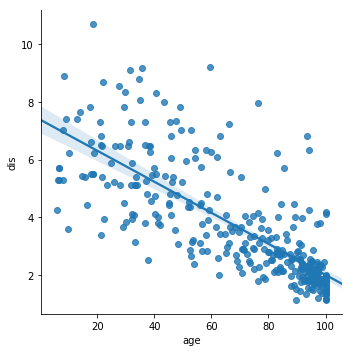

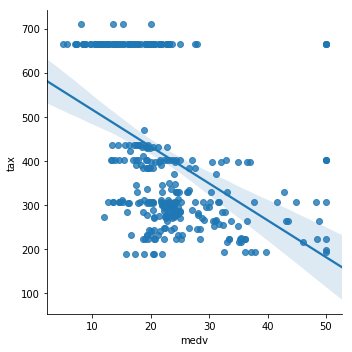

In [167]:
# chindueck some correlated variables with mdev

sns.lmplot(x='indus',y='dis',data=train_data)



sns.lmplot(x='age',y='dis',data=train_data)

sns.lmplot(x='medv',y='tax',data=train_data)

##### some interpretations for above and hypothesis 

In [170]:

# tax and red(highway) are highly correlated so one of the variables can be removed
# futher there are set of people living far away from highway they are paying less tax
# more aged houes are near the five work centers of boston
# the higher the nox level we can see that price is also lower
# income and medv is related

# hypothesis

# higher the crime and nox have lower rate (true)
# chas lake has higer price (true)

# age of the house and dis are effeting the price age is higher then the price is lower


In [6]:
train_data.columns

Index(['ID', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [17]:
train_data[['crim','nox',',medv']].groupby('medv').mean()
train_data[['chas','medv']].groupby('chas').mean()

,medv
chas,
0,22.295527
1,30.175000


In [24]:
train_data[['dis','age','medv']].groupby('medv').mean().head()

,dis,age
medv,,
5.0,1.4896,100.0
5.6,1.5888,100.0
7.0,1.6582,100.0
7.2,1.7044,100.0
7.4,1.5184,89.5


In [38]:

# looks like back and lstat are little related ..insome places blacks are less and lstat is high
train_data[['black','lstat','ptratio','medv','nox']].groupby('medv').mean().head()


train_data[['black','lstat','ptratio']].groupby('lstat').mean().head()


,black,lstat,ptratio,nox
medv,,,,
5.0,396.900,30.590,20.2,0.693
5.6,396.900,26.770,20.2,0.693
7.0,88.270,36.980,20.2,0.693
7.2,212.075,24.685,20.2,0.686
7.4,396.900,31.990,20.2,0.700


In [39]:
train_data[['black','lstat','ptratio','medv']].groupby('medv').mean().head()


,black,lstat,ptratio
medv,,,
5.0,396.900,30.590,20.2
5.6,396.900,26.770,20.2
7.0,88.270,36.980,20.2
7.2,212.075,24.685,20.2
7.4,396.900,31.990,20.2


In [10]:
train_data[['ptratio','tax']].groupby('ptratio').mean().head()


,tax
ptratio,
12.6,329.000000
13.0,264.000000
13.6,198.000000
14.7,385.791667
14.9,216.000000


In [22]:
test_data = pd.read_csv('test (1).csv')

test_data.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
1,6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
2,8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
3,9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93
4,10,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10


In [23]:
test_data.drop(['ID'],axis=1,inplace=True)

In [45]:
test_data.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
1,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
2,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
3,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93
4,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10


In [44]:
X_test = train_data.values


array([[  1.00000000e+00,   6.32000000e-03,   1.80000000e+01, ...,
          3.96900000e+02,   4.98000000e+00,   2.40000000e+01],
       [  2.00000000e+00,   2.73100000e-02,   0.00000000e+00, ...,
          3.96900000e+02,   9.14000000e+00,   2.16000000e+01],
       [  4.00000000e+00,   3.23700000e-02,   0.00000000e+00, ...,
          3.94630000e+02,   2.94000000e+00,   3.34000000e+01],
       ..., 
       [  5.03000000e+02,   4.52700000e-02,   0.00000000e+00, ...,
          3.96900000e+02,   9.08000000e+00,   2.06000000e+01],
       [  5.04000000e+02,   6.07600000e-02,   0.00000000e+00, ...,
          3.96900000e+02,   5.64000000e+00,   2.39000000e+01],
       [  5.06000000e+02,   4.74100000e-02,   0.00000000e+00, ...,
          3.96900000e+02,   7.88000000e+00,   1.19000000e+01]])

In [36]:
X = train_data.iloc[:,1:14].values

In [39]:
Y = train_data.loc[:,'medv'].values


##### Modeling 

In [11]:
#acctualy variables are not normaly distributed but few are nearly normal lets start with multiple linear regression


In [12]:
# linear regression is used to find the realation between variables.
# if will fit the X and Y and store the coefficients w and used least square method which is min|y-y^|*2 
# y = mx + b
# find m and then find b 


In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
reg = LinearRegression()

In [55]:
reg.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [58]:
reg.score(X,Y)

0.73313943555278027

In [49]:
Y_pred = reg.predict(test_data).round(decimals=2)

In [50]:
Y_pred

array([ 30.6 ,  25.1 ,  18.16,   9.3 ,  17.69,  16.65,  18.52,  15.24,
        12.78,  15.09,  19.33,  20.76,   7.26,  13.68,  23.77,  22.16,
        23.24,  28.24,   6.95,  27.57,  20.95,  23.88,  20.52,  21.72,
        20.93,  22.5 ,  26.04,  27.14,  29.19,  28.34,  35.62,  35.21,
        32.04,  21.36,  18.16,  20.69,  20.22,  20.07,  19.81,  22.81,
        14.24,  20.56,  20.68,  17.47,  13.28,  11.77,   8.1 ,  15.52,
        18.63,  21.7 ,  20.96,  33.67,  42.31,  26.24,  21.99,  24.16,
        32.21,  40.52,  35.36,  33.71,  29.79,  36.76,  17.13,  16.94,
        22.76,  23.42,  24.62,  28.28,  25.35,  30.63,  34.03,  35.91,
        33.32,  32.83,  28.24,  28.05,  22.9 ,  12.24,  19.22,  25.08,
        23.32,  20.92,  37.3 ,  43.18,  36.13,  34.74,  40.46,  26.35,
        21.97,  34.08,  36.65,  36.16,  30.4 ,  38.46,  26.69,  26.35,
        34.72,  24.11,  28.45,  28.55,  31.4 ,  30.01,  32.64,  25.66,
        25.44,  21.18,  25.08,  23.05,  19.2 ,  24.03,  23.96,  19.29,
      

In [101]:
from statsmodels.formula.api import ols

In [102]:
df = {'X':X,'Y':Y}

In [117]:
model = ols('Y~X',data=df)

In [72]:
summ = model.fit()

In [74]:
summ.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     67.41
Date:                Sun, 22 Oct 2017   Prob (F-statistic):           2.89e-83
Time:                        12:26:14   Log-Likelihood:                -990.09
No. Observations:                 333   AIC:                             2008.
Df Residuals:                     319   BIC:                             2061.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.0454      6.296      5.407      0.000      21.658      46.433
X[0]          -0.0525      0.054     -0.976      0.330      -0.158       0.053
X[1]           0.0474      0.017      2.805      0.005       0.014       0.081
X[2]           0.0539      0.074      0.725      0.469      -0.092       0.200
X[3]           3.7849      1.150      3.292      0.001       1.523       6.047
X[4]         -15.7397      4.856     -3.241      0.001     -25.293      -6.186
X[5]           3.7688      0.520      7.247      0.000       2.746       4.792
X[6]          -0.0046      0.017     -0.274      0.784      -0.038       0.029
X[7]          -1.5488      0.264     -5.860      0.000      -2.069      -1.029
X[8]           0.3290      0.082      4.019      0.000       0.168       0.490
X[9]          -0.0129      0.005     -2.847      0.005      -0.022      -0.004
X[10]         -0.8570      0.165     -5.183      0.000      -1.182      -0.532
X[11]          0.0117      0.004      3.243      0.001       0.005       0.019
X[12]         -0.6003      0.064     -9.403      0.000      -0.726      -0.475
==============================================================================
Omnibus:                      125.336   Durbin-Watson:                   1.100
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              488.547
Skew:                           1.611   Prob(JB):                    8.19e-107
Kurtosis:                       7.983   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [120]:
# SVR here each item is ploted as a point in dimention then hyper plan is formed separating the X and Y values

from sklearn.svm import SVR

In [121]:
svr = SVR()

In [123]:
svr.fit(X,Y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [127]:
svr.score(X,Y)

0.14574180834238382

In [1]:
#plt.scatter(reg)